In [140]:
# Import 'pandas' library for data manipulation
# Import 'pathlib' module to handle file paths
# Import 'matplotlib' library to create visualizations
# Import 'numpy' library for numerical operations
# Import 'scipy.stats' module for linear regression 

import pandas as pd 
from pathlib import Path 

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [139]:
# variable 'spotify_csv' is assigned the 'Path' object, representing the file path to 'spotify-2023.csv' file.

spotify_csv = Path("spotify-2023.csv")

# the pd.read_csv function reads the 'spotify-2023.csv' file and loads it into a Pandas DataFrame.

spotify_df = pd.read_csv(spotify_csv, encoding="latin-1")

# after reduced and renamed columns, first 5 rows of data are shown
spotify_df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [14]:
spotify_df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [15]:
# Create DataFrames with columns needed

spotify_columns_df = spotify_df[["artist(s)_name", "track_name", "released_year","streams", "in_spotify_charts", "in_apple_charts", "in_deezer_charts", "in_shazam_charts", "bpm", "danceability_%"]]

spotify_columns_df.head(10)



,artist(s)_name,track_name,released_year,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts,bpm,danceability_%
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2023,141381703,147,263,10,826,125,80
1,Myke Towers,LALA,2023,133716286,48,126,14,382,92,71
2,Olivia Rodrigo,vampire,2023,140003974,113,207,14,949,138,51
3,Taylor Swift,Cruel Summer,2019,800840817,100,207,12,548,170,55
4,Bad Bunny,WHERE SHE GOES,2023,303236322,50,133,15,425,144,65
5,"Dave, Central Cee",Sprinter,2023,183706234,91,213,17,946,141,92
6,"Eslabon Armado, Peso Pluma",Ella Baila Sola,2023,725980112,50,222,13,418,148,67
7,Quevedo,Columbia,2023,58149378,43,89,13,194,100,67
8,Gunna,fukumean,2023,95217315,83,210,11,953,130,85
9,"Peso Pluma, Yng Lvcas",La Bebe - Remix,2023,553634067,44,110,13,339,170,81


In [16]:
# rename columns

spotify_columns_df = spotify_columns_df.rename(columns={"track_name": "Song Title",
                                                       "artist(s)_name": "Artist",
                                                       "released_year": "Released Year",
                                                       "streams": "Streams",
                                                       "in_spotify_charts": "Spotify Charts",
                                                       "in_apple_charts": "Apple Charts",
                                                       "in_deezer_charts": "Deezer Charts",
                                                       "in_shazam_charts": "Shazam Charts",
                                                       "bpm": "BPM",
                                                       "danceability_%": "Danceability %"
                                                       })

spotify_columns_df

,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2023,141381703,147,263,10,826,125,80
1,Myke Towers,LALA,2023,133716286,48,126,14,382,92,71
2,Olivia Rodrigo,vampire,2023,140003974,113,207,14,949,138,51
3,Taylor Swift,Cruel Summer,2019,800840817,100,207,12,548,170,55
4,Bad Bunny,WHERE SHE GOES,2023,303236322,50,133,15,425,144,65
...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,My Mind & Me,2022,91473363,0,13,1,0,144,60
949,Taylor Swift,Bigger Than The Whole Sky,2022,121871870,0,0,0,0,166,42
950,"Feid, Paulo Londra",A Veces (feat. Feid),2022,73513683,0,0,0,0,92,80
951,"Feid, Sech, Jhayco",En La De Ella,2022,133895612,0,26,0,0,97,82


In [17]:
# find missing values 

spotify_columns_df.count()

Artist            953
Song Title        953
Released Year     953
Streams           953
Spotify Charts    953
Apple Charts      953
Deezer Charts     953
Shazam Charts     903
BPM               953
Danceability %    953
dtype: int64

In [18]:
# filling missing values with 0 

spotify_columns_df = spotify_columns_df.fillna(0)
spotify_columns_df.count()


Artist            953
Song Title        953
Released Year     953
Streams           953
Spotify Charts    953
Apple Charts      953
Deezer Charts     953
Shazam Charts     953
BPM               953
Danceability %    953
dtype: int64

In [19]:
# Detecting missingg or NA values
# NA values = Returns True 

fillna_values = spotify_columns_df.isna()
fillna_values

,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
948,False,False,False,False,False,False,False,False,False,False
949,False,False,False,False,False,False,False,False,False,False
950,False,False,False,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False,False,False,False


In [20]:
# Datatypes of values 

spotify_columns_df.dtypes

Artist            object
Song Title        object
Released Year      int64
Streams           object
Spotify Charts     int64
Apple Charts       int64
Deezer Charts      int64
Shazam Charts     object
BPM                int64
Danceability %     int64
dtype: object

In [21]:
# Deleting a weird value from DataFrame

value_to_delete = 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'
spotify_columns_df = spotify_columns_df[spotify_columns_df['Streams'] != value_to_delete]

spotify_columns_df



,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2023,141381703,147,263,10,826,125,80
1,Myke Towers,LALA,2023,133716286,48,126,14,382,92,71
2,Olivia Rodrigo,vampire,2023,140003974,113,207,14,949,138,51
3,Taylor Swift,Cruel Summer,2019,800840817,100,207,12,548,170,55
4,Bad Bunny,WHERE SHE GOES,2023,303236322,50,133,15,425,144,65
...,...,...,...,...,...,...,...,...,...,...
948,Selena Gomez,My Mind & Me,2022,91473363,0,13,1,0,144,60
949,Taylor Swift,Bigger Than The Whole Sky,2022,121871870,0,0,0,0,166,42
950,"Feid, Paulo Londra",A Veces (feat. Feid),2022,73513683,0,0,0,0,92,80
951,"Feid, Sech, Jhayco",En La De Ella,2022,133895612,0,26,0,0,97,82


In [22]:
# Converting float or object datatypes to integer datatype of columns with numerical values 

spotify_columns_df = spotify_columns_df.astype({"Streams": "int64"}, errors='raise')
spotify_columns_df["Streams"].dtype


dtype('int64')

In [23]:
spotify_columns_df['Shazam Charts'] = spotify_columns_df['Shazam Charts'].str.replace(',','')
spotify_columns_df = spotify_columns_df.fillna({'Shazam Charts': 0})
spotify_columns_df['Shazam Charts'] = spotify_columns_df['Shazam Charts'].astype("int64")
spotify_columns_df.dtypes

Artist            object
Song Title        object
Released Year      int64
Streams            int64
Spotify Charts     int64
Apple Charts       int64
Deezer Charts      int64
Shazam Charts      int64
BPM                int64
Danceability %     int64
dtype: object

In [24]:
# Calculating the maximum value from the "Streams" column

highest_streams = spotify_columns_df["Streams"].max()

print(highest_streams)

3703895074


In [25]:
# Calculating the minimum value from the "Streams" column

lowest_streams = spotify_columns_df["Streams"].min()

print(lowest_streams)

2762


In [26]:
# Calculating descroptive statistics for the "Streams" column

stats_streams = spotify_columns_df["Streams"].describe()

print(stats_streams)

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: Streams, dtype: float64


In [27]:
# Calculating descriptive statistics for all the columns with numerical values

stats_spotify_columns = spotify_columns_df.describe()

print(stats_spotify_columns)

       Released Year       Streams  Spotify Charts  Apple Charts  \
count     952.000000  9.520000e+02      952.000000    952.000000   
mean     2018.288866  5.141374e+08       12.022059     51.963235   
std        11.011397  5.668569e+08       19.582405     50.628850   
min      1930.000000  2.762000e+03        0.000000      0.000000   
25%      2020.000000  1.416362e+08        0.000000      7.000000   
50%      2022.000000  2.905309e+08        3.000000     38.500000   
75%      2022.000000  6.738690e+08       16.000000     87.000000   
max      2023.000000  3.703895e+09      147.000000    275.000000   

       Deezer Charts  Shazam Charts         BPM  Danceability %  
count     952.000000     952.000000  952.000000      952.000000  
mean        2.669118      56.907563  122.553571       66.984244  
std         6.038152     157.513706   28.069601       14.631282  
min         0.000000       0.000000   65.000000       23.000000  
25%         0.000000       0.000000   99.750000       57.

In [28]:
# Creating a new DataFrame the top 5 songs

spotify_columns_top5_df = spotify_columns_df.head(5)

spotify_columns_top5_df

,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
0,"Latto, Jung Kook",Seven (feat. Latto) (Explicit Ver.),2023,141381703,147,263,10,826,125,80
1,Myke Towers,LALA,2023,133716286,48,126,14,382,92,71
2,Olivia Rodrigo,vampire,2023,140003974,113,207,14,949,138,51
3,Taylor Swift,Cruel Summer,2019,800840817,100,207,12,548,170,55
4,Bad Bunny,WHERE SHE GOES,2023,303236322,50,133,15,425,144,65


In [29]:
# Data Cleaning: Sorting Streams in descending (highest to lowest) order with parameter (ascending=False) for top 5 songs

spotify_columns_top5_df = spotify_columns_df.sort_values(["Streams"], ascending=False)

spotify_columns_top5_df.head(5)


,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
55,The Weeknd,Blinding Lights,2019,3703895074,69,199,20,0,171,50
179,Ed Sheeran,Shape of You,2017,3562543890,10,0,7,0,96,83
86,Lewis Capaldi,Someone You Loved,2018,2887241814,53,125,0,0,110,50
620,Tones and I,Dance Monkey,2019,2864791672,0,167,6,0,98,82
41,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2018,2808096550,78,117,4,69,90,76


In [30]:
# Creating a DataFrame for the bottom 5 songs 

spotify_columns_bottom5_df = spotify_columns_df.tail(5)

spotify_columns_bottom5_df

,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
948,Selena Gomez,My Mind & Me,2022,91473363,0,13,1,0,144,60
949,Taylor Swift,Bigger Than The Whole Sky,2022,121871870,0,0,0,0,166,42
950,"Feid, Paulo Londra",A Veces (feat. Feid),2022,73513683,0,0,0,0,92,80
951,"Feid, Sech, Jhayco",En La De Ella,2022,133895612,0,26,0,0,97,82
952,Burna Boy,Alone,2022,96007391,2,18,1,0,90,61


In [31]:
# Data Cleaning: Sorting Streams in ascending (lowest to highest) order with parameter (ascending=True) for bottom 5 songs

spotify_columns_bottom5_df = spotify_columns_df.sort_values(["Streams"], ascending=True)

spotify_columns_bottom5_df.head(5)

,Artist,Song Title,Released Year,Streams,Spotify Charts,Apple Charts,Deezer Charts,Shazam Charts,BPM,Danceability %
123,"Carin Leon, Grupo Frontera",Que Vuelvas,2022,2762,26,110,9,71,162,49
393,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",Jhoome Jo Pathaan,2022,1365184,4,78,0,0,105,82
144,"Sog, Ryan Castro, Peso Pluma",QUEMA,2023,11599388,31,29,3,208,97,79
142,"Mc Pedrinho, DJ 900","Gol Bolinha, Gol Quadrado 2",2023,11956641,8,2,2,66,133,93
68,Post Malone,Overdrive,2023,14780425,36,32,1,26,140,56


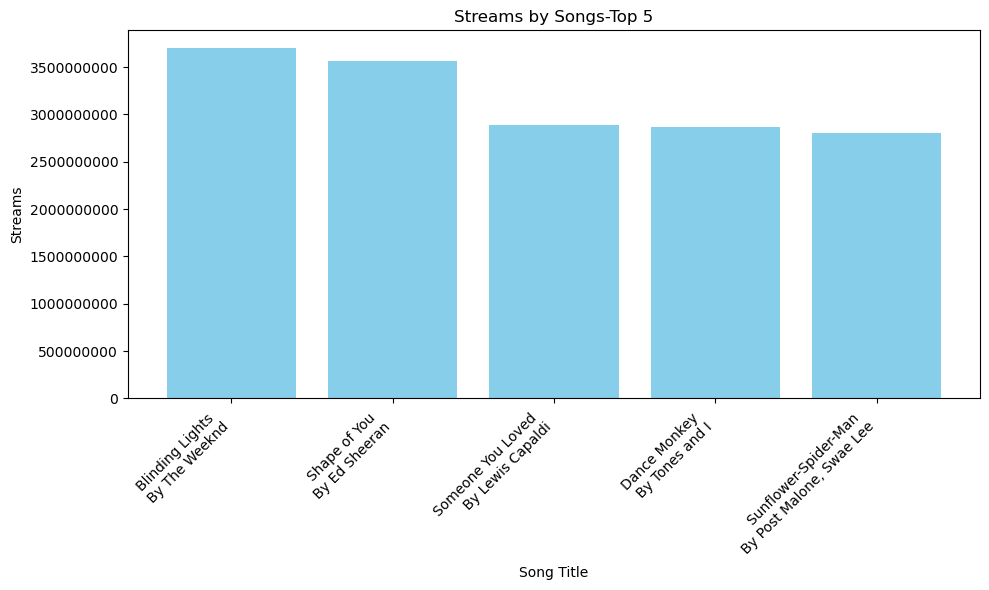

In [113]:
# Data Visualization: This code creates a bar chart to visualize the stream count by songs from the top 5. 

# The 'data' dictionary contains two lists: 'song tittle' and 'streams'
# 'Song Title' contains the titles of the top songs, followed by the name of the artist.
# 'Streams' contains the respective stream counts for each song.

data = {'Song Title': ['Blinding Lights \n By The Weeknd', 'Shape of You \n By Ed Sheeran', 
                       'Someone You Loved \n By Lewis Capaldi', 'Dance Monkey \n By Tones and I',
                       'Sunflower-Spider-Man \n By Post Malone, Swae Lee'],
        'Streams': [3703895074, 3562543890, 2887241814, 2864791672, 2808096550]}

# Bar chart creation: 

# Set the size of the figure 
plt.figure(figsize=(10,6))

# Set x-axis to represent 'Song Tittles' and y-axis 'Streams'
plt.bar(data['Song Title'], data['Streams'], color='skyblue')

# Set rotation of x-axis labels by 45 degrees for readability as horizontal axis
# Display y-axis labels in plain format
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')


# Set title, x-axis label, and y-axis label

plt.xlabel('Song Title')
plt.ylabel('Streams')
plt.title('Streams by Songs-Top 5')

# Fitting elements within the figure

plt.tight_layout()
plt.savefig("Barchart-top5")
plt.show()

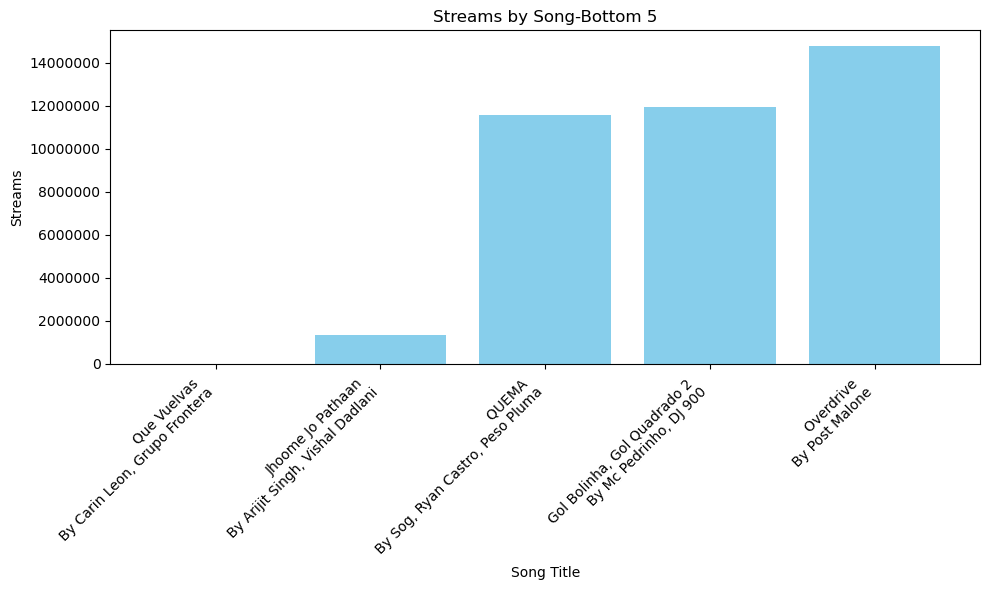

In [114]:
# Data Visualization: This code creates a bar chart to visualize streams count by Songs for the bottom 5 songs

# The 'data' dictionary contains two lists: 'song tittle' and 'streams'
# 'Song Title' contains the titles of the last 5 songs, followed by the name of the artist.
# 'Streams' contains the respective stream counts for each song.

data = {'Song Title': ["Que Vuelvas \n By Carin Leon, Grupo Frontera",
                       "Jhoome Jo Pathaan \n By Arijit Singh, Vishal Dadlani",
                       "QUEMA \n By Sog, Ryan Castro, Peso Pluma",
                       "Gol Bolinha, Gol Quadrado 2 \n By Mc Pedrinho, DJ 900","Overdrive \n By Post Malone"],
        'Streams': [2762, 1365184, 11599388, 11956641, 14780425]}


# Bar chart creation: 

# Set the size of the figure 
plt.figure(figsize=(10,6))

# Set x-axis to represent 'Song Tittles' and y-axis 'Streams'
plt.bar(data['Song Title'], data['Streams'], color='skyblue')

# Set rotation of x-axis labels by 45 degrees for readability as horizontal axis
# Display y-axis labels in plain format
plt.xticks(rotation=45, ha='right')
plt.ticklabel_format(style='plain', axis='y')


# Set title, x-axis label, and y-axis label
# Fitting elements within the figure

plt.xlabel('Song Title')
plt.ylabel('Streams')
plt.title('Streams by Song-Bottom 5')
plt.tight_layout()
plt.savefig("Barchart-bottom5")
plt.show()

In [141]:
# Desxriptive statistics: max and min for BPM

print("Max: " + str(spotify_columns_df['BPM'].max()))
print("Min: " + str(spotify_columns_df['BPM'].min()))

Max: 206
Min: 65


In [102]:
# Data Visualization: Pie Chart

# Defining the boundaries for the bins into groups of BPMs.

bins = [60, 89, 119, 149, 179, 210]

groups = ['60 to 89 bpm', '90 to 119 bpm', '120 to 149 bpm', '150 to 179 bpm', '180 to 210 bpm']
pd.cut(spotify_columns_df['BPM'], bins, labels=groups)


0      120 to 149 bpm
1       90 to 119 bpm
2      120 to 149 bpm
3      150 to 179 bpm
4      120 to 149 bpm
            ...      
948    120 to 149 bpm
949    150 to 179 bpm
950     90 to 119 bpm
951     90 to 119 bpm
952     90 to 119 bpm
Name: BPM, Length: 952, dtype: category
Categories (5, object): ['60 to 89 bpm' < '90 to 119 bpm' < '120 to 149 bpm' < '150 to 179 bpm' < '180 to 210 bpm']

In [115]:
# Slicing bpm counts of stream 

spotify_bpm_counts = pd.cut(spotify_columns_df['BPM'], bins, labels=groups)
spotify_bpm_counts = spotify_bpm_counts.value_counts()
spotify_bpm_counts

BPM
120 to 149 bpm    353
90 to 119 bpm     338
150 to 179 bpm    134
60 to 89 bpm       98
180 to 210 bpm     29
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

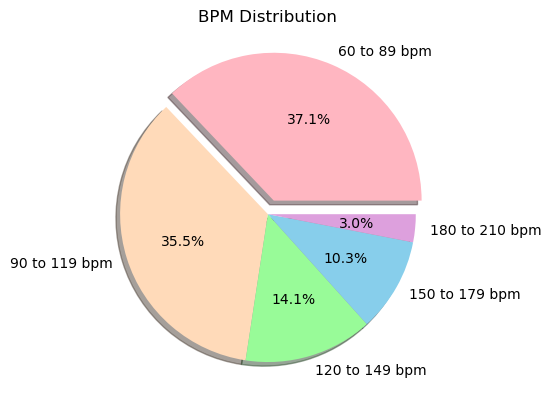

In [118]:
# Pie chart

colors = ['lightpink', 'peachpuff', 'palegreen', 'skyblue', 'plum']
explode = (.1,0,0,0,0)
plt.pie(spotify_bpm_counts, labels=groups, autopct="%1.1f%%", shadow=True, explode=explode, colors=colors)
plt.title('BPM Distribution')
plt.savefig("BPM-Distribution")
plt.show

The r-squared is: 0.003055149437270801


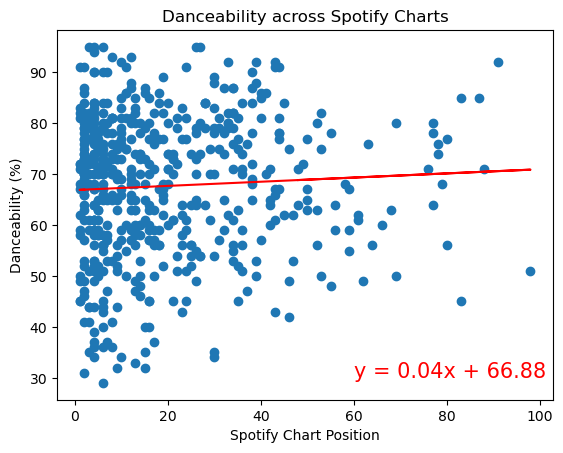

In [145]:
# Data Visualization: Data from DataFrame to create scatter plot

spotifycharts_scatterplot = spotify_columns_df[['Spotify Charts', 'Danceability %']]

# Filter out fillna values of 0 out of 'Spotify Charts'

spotifycharts_scatterplot = spotifycharts_scatterplot.loc[(spotifycharts_scatterplot['Spotify Charts'] > 0 ) &
                                                          (spotifycharts_scatterplot['Spotify Charts'] < 100)]


# Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set Variables

x_axis = spotifycharts_scatterplot['Spotify Charts']
y_axis = spotifycharts_scatterplot['Danceability %']

# Plotting data 

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (60,30), fontsize=15,color="red")
plt.title("Danceability across Spotify Charts")
plt.xlabel('Spotify Chart Position')
plt.ylabel('Danceability (%)')
plt.savefig("scatter1")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [161]:
spotifycharts_scatterplot.describe()


,Spotify Charts,Danceability %
count,540.000000,540.000000
mean,19.490741,67.681481
std,18.751027,13.868399
min,1.000000,29.000000
25%,5.000000,58.000000
50%,13.000000,70.000000
75%,30.000000,78.000000
max,98.000000,95.000000


The r-squared is: 0.0011874391463579082


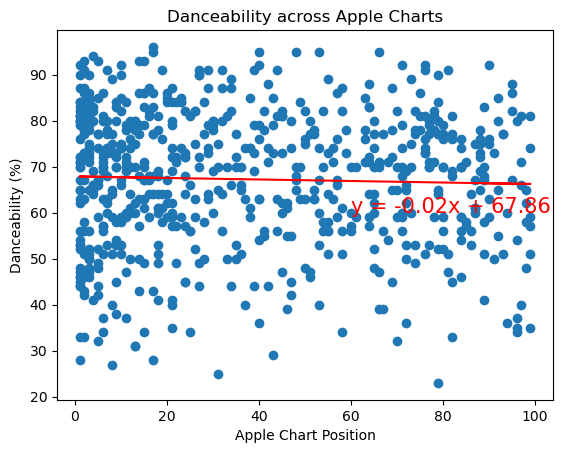

In [158]:
# Data Visualization: Data from DataFrame to create scatter plot

applecharts_scatterplot = spotify_columns_df[['Apple Charts', 'Danceability %']]

# Filter out fillna values of 0 out of 'Spotify Charts'

applecharts_scatterplot = applecharts_scatterplot.loc[(applecharts_scatterplot['Apple Charts'] > 0) & (applecharts_scatterplot['Apple Charts'] < 100)]


# Set Variables

x_axis = applecharts_scatterplot['Apple Charts']
y_axis = applecharts_scatterplot['Danceability %']

# Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting data 

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (60,60), fontsize=15,color="red")
plt.title("Danceability across Apple Charts")
plt.xlabel('Apple Chart Position')
plt.ylabel('Danceability (%)')
plt.savefig("scatter2")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [162]:
applecharts_scatterplot.describe()

,Apple Charts,Danceability %
count,672.000000,672.000000
mean,37.858631,67.233631
std,30.840670,14.757772
min,1.000000,23.000000
25%,10.000000,57.750000
50%,29.000000,70.000000
75%,65.250000,79.000000
max,99.000000,96.000000


The r-squared is: 0.0007011024122913973


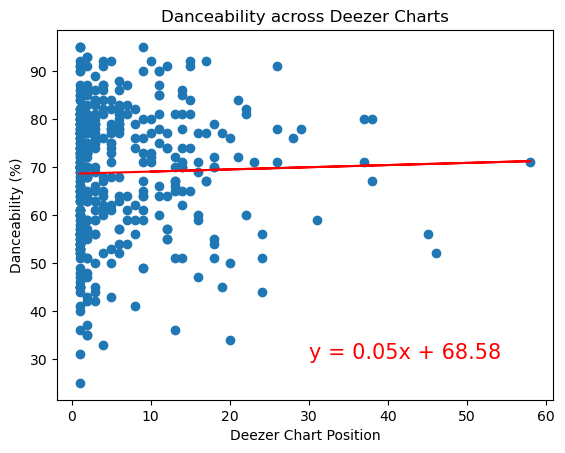

In [156]:
# Data Visualization: Data from DataFrame to create scatter plot

deezercharts_scatterplot = spotify_columns_df[['Deezer Charts', 'Danceability %']]

# Filter out fillna values of 0 out of 'Spotify Charts'

deezercharts_scatterplot = deezercharts_scatterplot.loc[(deezercharts_scatterplot['Deezer Charts'] > 0) & (deezercharts_scatterplot['Deezer Charts'] < 100)]

# Set Variables

x_axis = deezercharts_scatterplot['Deezer Charts']
y_axis = deezercharts_scatterplot['Danceability %']

# Linear Regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting data 

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (30,30), fontsize=15,color="red")
plt.title("Danceability across Deezer Charts")
plt.xlabel('Deezer Chart Position')
plt.ylabel('Danceability (%)')
plt.savefig("scatter3")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [165]:
deezercharts_scatterplot.describe()


,Deezer Charts,Danceability %
count,395.000000,395.000000
mean,6.432911,68.868354
std,7.983004,13.646475
min,1.000000,25.000000
25%,1.000000,59.000000
50%,3.000000,70.000000
75%,9.000000,79.000000
max,58.000000,95.000000


The r-squared is: 0.0001174772225996837


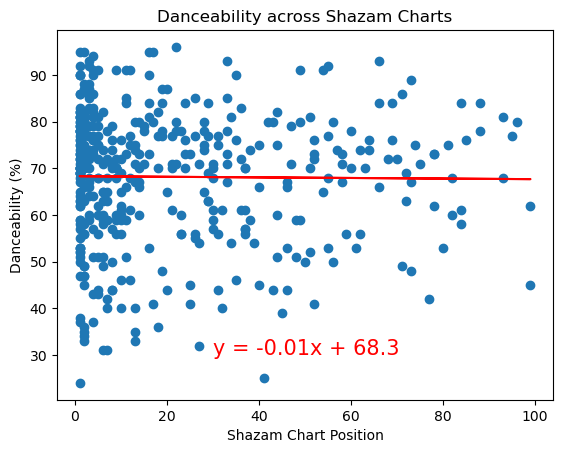

In [159]:
# Data Visualization: Data from DataFrame to create scatter plot

shazamcharts_scatterplot = spotify_columns_df[['Shazam Charts', 'Danceability %']]

# Filter out fillna values of 0 out of 'Spotify Charts'

shazamcharts_scatterplot = shazamcharts_scatterplot.loc[(shazamcharts_scatterplot['Shazam Charts'] > 0) & (shazamcharts_scatterplot['Shazam Charts'] < 100)]

# Set Variables

x_axis = shazamcharts_scatterplot['Shazam Charts']
y_axis = shazamcharts_scatterplot['Danceability %']



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plotting data 

plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (30,30), fontsize=15,color="red")
plt.title("Danceability across Shazam Charts")
plt.xlabel('Shazam Chart Position')
plt.ylabel('Danceability (%)')
plt.savefig("scatter4")
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [160]:
shazamcharts_scatterplot.describe()

,Shazam Charts,Danceability %
count,426.000000,426.000000
mean,21.467136,68.161972
std,24.340237,14.290089
min,1.000000,24.000000
25%,2.000000,59.000000
50%,10.000000,70.000000
75%,33.000000,78.000000
max,99.000000,96.000000


In [47]:
# Finding unique values present in 'Released Year' column

spotify_columns_df["Released Year"].unique()


array([2023, 2019, 2022, 2013, 2014, 2018, 2017, 2020, 2016, 2012, 1999,
       2008, 1975, 2021, 2015, 2011, 2004, 1985, 2007, 2002, 2010, 1983,
       1992, 1968, 1984, 2000, 1997, 1995, 2003, 1973, 1930, 1994, 1958,
       1957, 1963, 1959, 1970, 1971, 1952, 1946, 1979, 1950, 1942, 1986,
       2005, 1991, 1996, 1998, 1982, 1987], dtype=int64)

In [125]:
# Data Aggregation: 

# Create separat groups for each unique value of 'Released Year' column
# Calculate the average value of the number of 'Streams' for each 'Released Year' group. 

releasedyear_linechart_df = spotify_columns_df.groupby("Released Year")
average_streams_releasedyear = releasedyear_linechart_df['Streams'].mean()

average_streams_releasedyear

Released Year
1930    9.059852e+07
1942    3.955914e+08
1946    3.897720e+08
1950    4.732483e+08
1952    3.955914e+08
1957    4.599810e+08
1958    4.368543e+08
1959    2.867089e+08
1963    4.370878e+08
1968    1.145728e+09
1970    5.200345e+08
1971    4.604928e+08
1973    8.385868e+08
1975    2.103053e+09
1979    4.039395e+08
1982    1.751377e+08
1983    1.593271e+09
1984    8.679063e+08
1985    1.115405e+09
1986    5.668379e+08
1987    1.553498e+09
1991    1.029420e+09
1992    1.271293e+09
1994    1.449779e+09
1995    9.685020e+08
1996    1.069331e+08
1997    1.037625e+08
1998    1.284943e+09
1999    1.080616e+09
2000    9.834935e+08
2002    1.446620e+09
2003    1.584021e+09
2004    8.789296e+08
2005    1.805775e+08
2007    1.217121e+09
2008    1.240408e+09
2010    1.081406e+09
2011    9.363213e+08
2012    1.341534e+09
2013    1.220192e+09
2014    1.264047e+09
2015    9.937214e+08
2016    1.124608e+09
2017    1.367723e+09
2018    1.503052e+09
2019    1.051970e+09
2020    9.379387e+08

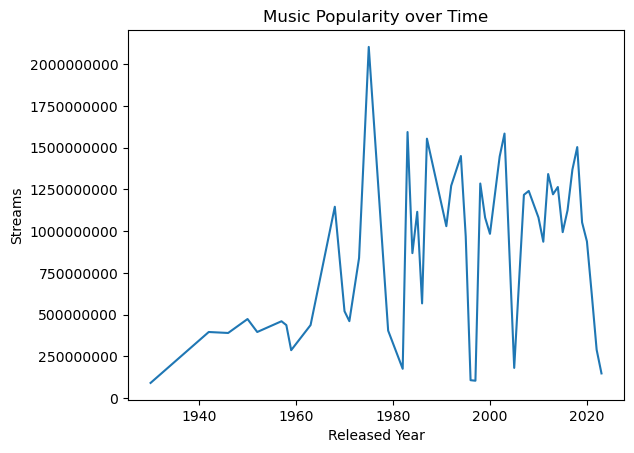

In [138]:
# Data Visualization: Line Chart 

plt.plot(average_streams_releasedyear)
plt.title("Music Popularity over Time")
plt.xlabel('Released Year')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain', axis='y')

plt.savefig("Streams-accrossyr1")
plt.show()



In [129]:
spotify_reducedyear_df = spotify_columns_df.loc[spotify_columns_df["Released Year"] > 2020]

releasedyear_linechart_df = spotify_reducedyear_df.groupby("Released Year")
average_streams_releasedyear = releasedyear_linechart_df['Streams'].mean()

average_streams_releasedyear

Released Year
2021    6.202362e+08
2022    2.895582e+08
2023    1.474771e+08
Name: Streams, dtype: float64

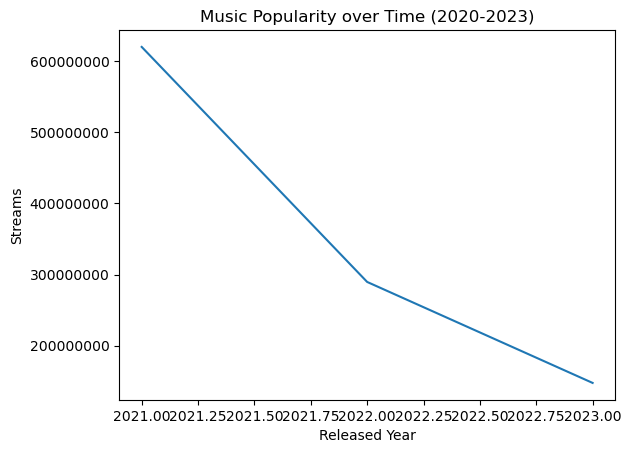

In [131]:
plt.plot(average_streams_releasedyear)
plt.title("Music Popularity over Time (2020-2023)")
plt.xlabel('Released Year')
plt.ylabel('Streams')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

plt.savefig("Streams-accrossyr2")
plt.show()